# Set Up Environment

In [1]:
import os, sys, argparse
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns

# 

# Define Functions

In [2]:
def get_count_df(df, aa_col, cols, vals):
    
    counts = []
    
    for i in range(len(cols)):
        current_col = cols[i]
        current_df = df[df[current_col] == vals[i]]
        counts.append(len(current_df[aa_col].unique()))
        
    return counts

In [3]:
def get_normalized_functions(df, aa_col, cols, vals, labels):
    
    subset_df = df[[aa_col] + cols] 
    
    subset_df = subset_df.drop_duplicates()
    
    subset_counts = get_count_df(subset_df, aa_col, cols, vals)
    
    count_df = pd.DataFrame()
    count_df['Function'] = labels
    count_df['Count'] = subset_counts
    count_df['Percent'] = count_df['Count'].map(lambda x: (float(x)/sum(subset_counts))*100)
    
    return count_df

In [4]:
def get_new_grouped_bar_plot_h(df, xcol, ycol, ylabel, name, colors, sz, ylim):
    
    fig = plt.figure(figsize =(8, 6))
    
    sns.barplot(data=df, x=xcol, y=ycol, palette = colors, hue = 'Reactivity')
    
    plt.ylabel(ycol, size = sz)
    plt.xlabel(ylabel, size = sz)    
    plt.yticks(size = sz) 
    plt.xticks(size = sz)

    plt.legend(frameon = False, loc = 'upper right', fontsize = 20, title = 'Reactivity', title_fontsize = 20)

    plt.show()

# 

# Read isoTOP Residue Function Annotations

In [5]:
df = pd.read_csv('../data/isotop_residue_function.csv')

In [6]:
df.shape

(9783, 50)

In [7]:
df

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,active_region,as_category,binding_region,bs_category,disordered,disulfide,redox,metal_binding,zinc_binding,zinc_finger
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9778,Q9UMR2_C393,Q9UMR2,DDX19B ATP-dependent RNA helicase DDX19B,VLVTTNVC*AR,NaN,NaN,NaN,2.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9779,Q9Y365_C74,Q9Y365,STARD10 PCTP-like protein,MEC*CDVPAETLYDVLHDIEYR,NaN,NaN,NaN,2.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9780,Q9Y365_C75,Q9Y365,STARD10 PCTP-like protein,MECC*DVPAETLYDVLHDIEYR,NaN,NaN,NaN,2.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9781,Q9Y3F4_C340,Q9Y3F4,STRAP Serine-threonine kinase receptor-associa...,IGFPETTEEELEEIASENSDC*IFPSAPDVK,NaN,NaN,NaN,4.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 

# Update List of Cysteines as Active and Binding Sites

In [8]:
as_df = df[(df['active_region'] == 'yes') | (df['as_category'] == 'yes')]
as_ids = list(as_df['identifier'].unique())
df['active_site'] = np.where(df['identifier'].isin(as_ids), 'yes', None)

In [9]:
bs_df = df[(df['binding_region'] == 'yes') | (df['metal_binding'] == 'yes') | (df['bs_category'] == 'yes')]
bs_ids = list(bs_df['identifier'].unique())
df['binding_site'] = np.where(df['identifier'].isin(bs_ids), 'yes', None)

# 

# Update List of Cysteines without Functional Annotations

In [10]:
no_function_df = df[(df['active_site'] != 'yes') & (df['binding_site'] != 'yes') & (df['disordered'] != 'yes') & (df['disulfide'] != 'yes') & (df['redox'] != 'yes')]
no_function_ids = list(no_function_df['identifier'].unique())
df['unknown'] = np.where(df['identifier'].isin(no_function_ids), 'yes', None)

# 

## Subset Cysteines by Reactivity 

In [11]:
h_df = df[df['mean'] <= 2.3]
l_df = df[df['mean'] >= 10]
m_df = df[(df['mean'] > 2.3) & (df['mean'] < 10)]

# 

## Define Cysteines by Reactivity

In [12]:
def get_target(df):
    vals = []
    
    for index, row in df.iterrows():
        if row['mean'] <= 2.3:
            vals.append('High')
        elif row['mean'] >= 10:
            vals.append('Low')
        else:
            vals.append('Medium')
            
    df['Reactivity'] = vals
    
    return df

In [13]:
df = get_target(df)

# 

# Count Number of Cysteines in Each Functional Group

In [14]:
function_cols = ['active_site', 'binding_site', 'disordered', 'disulfide', 'redox', 'unknown']
function_labels = ['Active\nSite', 'Binding\nSite', 'Disordered\nRegion', 'Disulfide\nBond', 'Redox\nActive', 'NA']
function_vals = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes']

In [15]:
h_norm_function_df = get_normalized_functions(h_df, 'identifier', function_cols, function_vals, function_labels)
h_norm_function_df

,Function,Count,Percent
0,Active\nSite,53,6.050228
1,Binding\nSite,68,7.762557
2,Disordered\nRegion,10,1.141553
3,Disulfide\nBond,41,4.680365
4,Redox\nActive,27,3.082192
5,NA,677,77.283105


In [16]:
m_norm_function_df = get_normalized_functions(m_df, 'identifier', function_cols, function_vals, function_labels)
m_norm_function_df

,Function,Count,Percent
0,Active\nSite,137,1.702075
1,Binding\nSite,663,8.237048
2,Disordered\nRegion,81,1.006336
3,Disulfide\nBond,74,0.919369
4,Redox\nActive,16,0.198782
5,NA,7078,87.936390


In [17]:
l_norm_function_df = get_normalized_functions(l_df, 'identifier', function_cols, function_vals, function_labels)
l_norm_function_df

,Function,Count,Percent
0,Active\nSite,11,1.101101
1,Binding\nSite,61,6.106106
2,Disordered\nRegion,14,1.401401
3,Disulfide\nBond,3,0.300300
4,Redox\nActive,1,0.100100
5,NA,909,90.990991


# 

## Concatonate Functional Counts for High and Low Reactive Cysteines

In [18]:
h_norm_function_df['Reactivity'] = 'High'
l_norm_function_df['Reactivity'] = 'Low'
m_norm_function_df['Reactivity'] = 'Medium'
together_norm_function_df = pd.concat([h_norm_function_df, m_norm_function_df, l_norm_function_df])

# 

# Plot Number of Cysteines involved in Active Sites, Binding Sites, Disordered Regions, Disulfides, are Redox Active, and NA

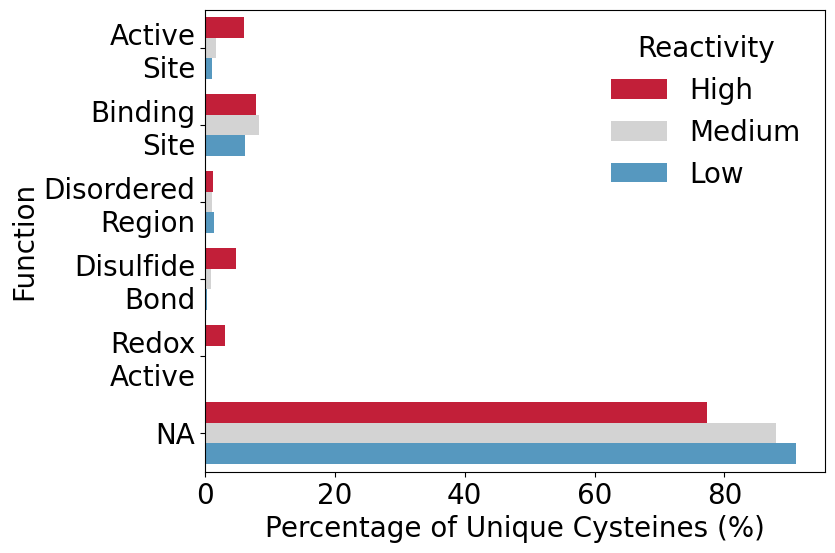

In [19]:
get_new_grouped_bar_plot_h(together_norm_function_df, 
                 'Percent', 'Function', 
                 'Percentage of Unique Cysteines (%)',
                 'h_l_isotop_with_na_h_percent', 
                 ['#dd0426', 'lightgrey', '#449dd1'], 20, 100)

# 

# Plot Number of Cysteines involved in Zinc Binding, Zing Finger Regions, and Metal Binding

In [20]:
df.groupby('Reactivity')['metal_binding'].value_counts()

Reactivity  metal_binding
High        yes               8
Low         yes              14
Medium      yes              83
Name: metal_binding, dtype: int64

In [21]:
df.groupby('Reactivity')['zinc_binding'].value_counts()

Reactivity  zinc_binding
High        yes              4
Low         yes             13
Medium      yes             56
Name: zinc_binding, dtype: int64

In [22]:
df.groupby('Reactivity')['zinc_finger'].value_counts()

Reactivity  zinc_finger
High        yes            18
Low         yes            26
Medium      yes            97
Name: zinc_finger, dtype: int64

In [23]:
metal_new_df = pd.DataFrame()
metal_new_df['Reactivity'] = ['High', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low']
metal_new_df['Category'] = ['Metal\nBinding', 'Zinc\nBinding', 'Zinc\nFinger', 'Metal\nBinding', 'Zinc\nBinding', 'Zinc\nFinger', 'Metal\nBinding', 'Zinc\nBinding', 'Zinc\nFinger']
metal_new_df['Count'] = [8, 4, 18, 83, 56, 97, 14, 13, 26]

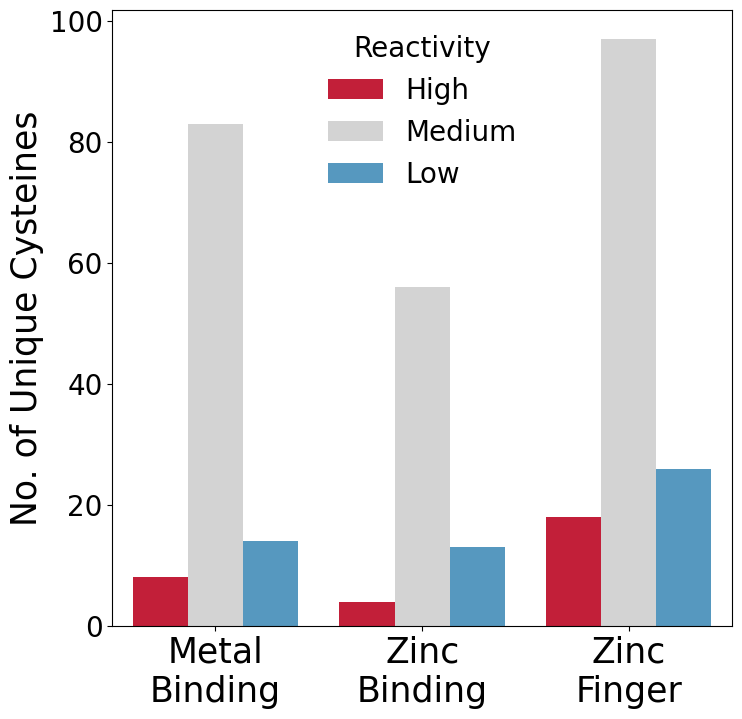

In [24]:
#create bar chart
fig = plt.figure(figsize =(8, 8))

sns.barplot(data=metal_new_df, x='Category', y='Count', palette = ['#dd0426', 'lightgrey', '#449dd1'], hue = 'Reactivity')

plt.ylabel('No. of Unique Cysteines', size = 25)
plt.xlabel('', size = 20)
plt.yticks(size = 20) 
plt.xticks(size = 25)

plt.legend(frameon = False, loc = 'upper center', fontsize = 20, title = 'Reactivity', title_fontsize = 20)

plt.show()